In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import zscore

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
# Adjust display and formatting settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [30, 15]
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

### Generate distinct clusters using multivariate normal distribution

In [3]:
# Generate three clusters from normal distribution
np.random.seed(1)  
a = np.random.multivariate_normal([10, 0], [[2, 1], [1, 2]], size=[25,])
b = np.random.multivariate_normal([0, 20], [[2, 1], [1, 2]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[2, 1], [1, 2]], size=[100,])

### Add generated data to a dataframe

In [4]:
#Combine all three arrays a,b,c into a dataframe
X = np.concatenate((a, b, c), axis=0)
X = pd.DataFrame(data = X, columns = ['X1', 'X2'])

# Add cluster names to the dataframe
X.loc[:25, 'class'] = 'a'
X.loc[25:75, 'class'] = 'b'
X.loc[75:, 'class'] = 'c'

X.head()

,X1,X2,class
0,8.443,-2.422,a
1,11.406,-0.112,a
2,10.568,-2.687,a
3,8.401,-2.675,a
4,9.786,-0.567,a


### Visualize clusters

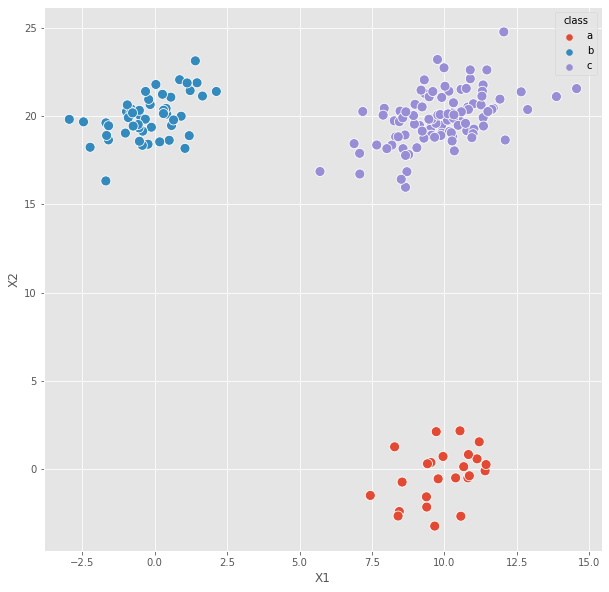

In [6]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = X, x = 'X1', y = 'X2', hue = 'class', s = 100);

### Standardize the data

In [7]:
# Standardize data
X_z = X.drop(columns = 'class').apply(zscore)
X_z.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,175.000,0.000,1.003,-2.098,-1.232,0.483,0.709,1.594
X2,175.000,-0.000,1.003,-2.799,0.197,0.359,0.477,1.076


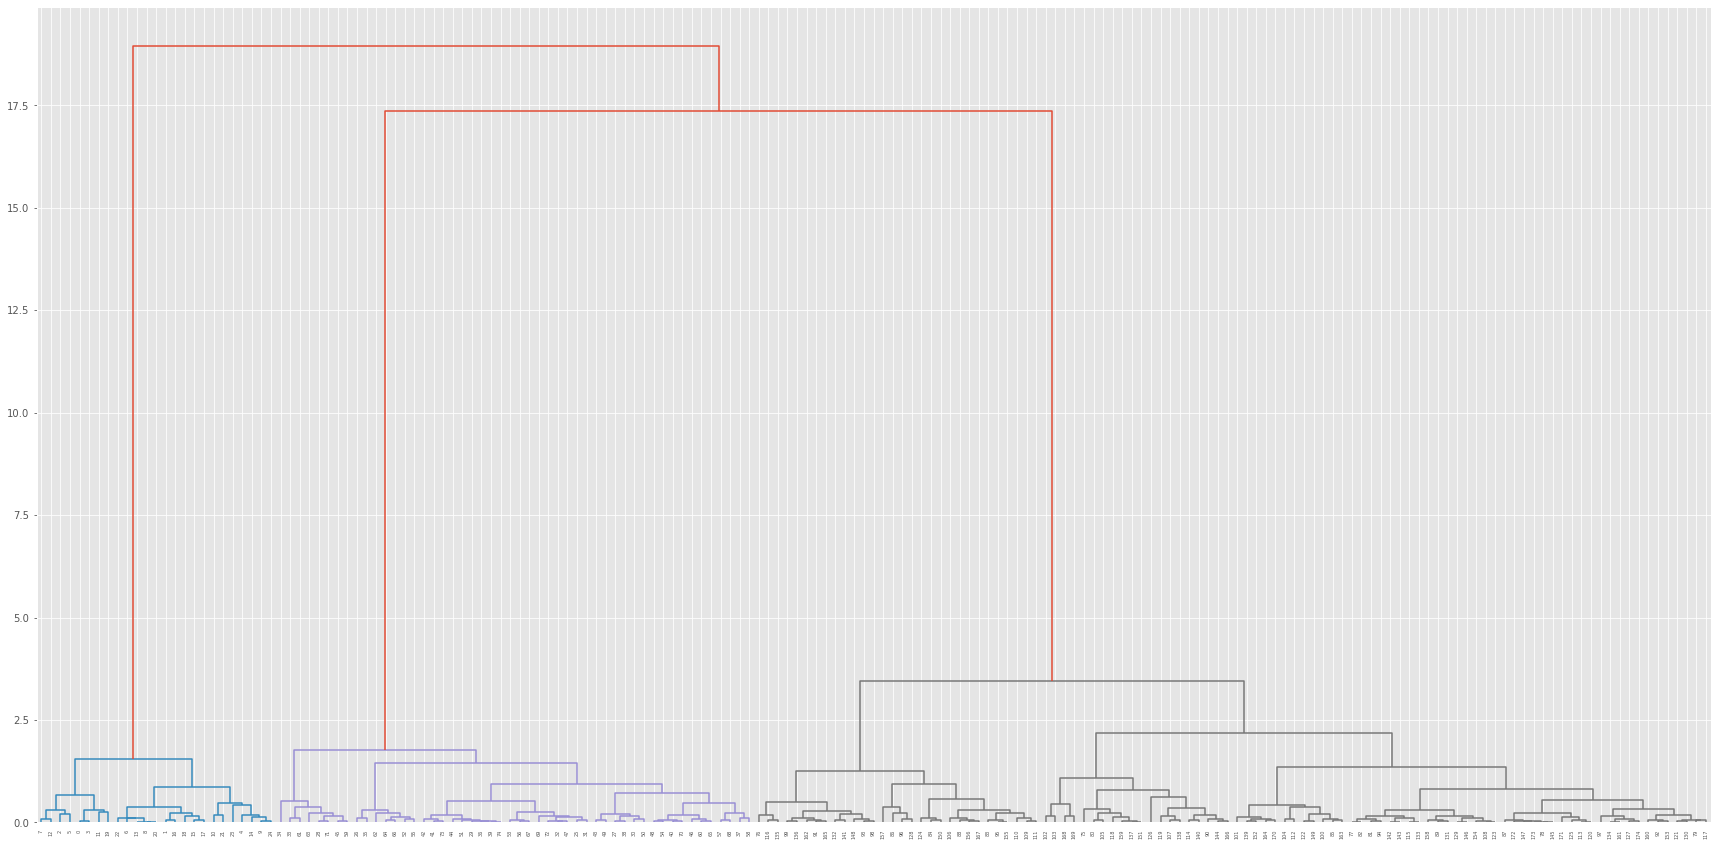

In [8]:
# Build a dendrogram and chose the optimal # of clusters based on distances
dend = shc.dendrogram(shc.linkage(X_z, method='ward'))

### Cluster data

In [9]:
# Find clusters and store them
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

labels = cluster.fit_predict(X_z)

X['cluster'] = labels

### Check results

In [10]:
pd.crosstab(X['class'], X['cluster'])

cluster,0,1,2
class,,,
a,0,25,0
b,0,0,50
c,100,0,0


In [11]:
print('Avg silhouette score:')
print('3 clusters: %.2f' % silhouette_score(X_z, X['cluster']))

Avg silhouette score:
3 clusters: 0.81
